## <strong> Filename: </strong> <em>covid_19_time_serires_daily_growth_rate.ipynb<em>
##### <strong>Description:</strong> <em>COVID-19 Daily Growth Rate (DGR) in the world using dataset provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases</em>
##### <strong>Author:</strong> <em> Carlos Eduardo Beluzo (cbeluzo@gmail.com)</em>
##### <strong>Creation:</strong> <em> Mar/2020 </em>
##### <strong>Version:</strong> <em> 2020.03-2 </em>

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly as plt
import datetime as dt
import math 

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df['Province/State'] = df['Province/State'].fillna('n/a')
df = df.fillna(0)
dfA = df.drop(['Province/State','Lat','Long'], axis = 1)
dfA = dfA.groupby('Country/Region').sum().T
dfA = dfA.reset_index()
dfA = dfA.rename(columns = {'index':'Day'})
dfA[['Day']] = pd.to_datetime(dfA['Day'])

#dfA.head()

#Calculate crescimento rate
dfFinal = dfA.copy()

for country in dfA.columns[1:]:
    dfCountry = pd.DataFrame(dfA[[country]])
    dfAux =  pd.DataFrame(data={country:[0]})
    dfAux = dfAux.append(pd.DataFrame(dfCountry[country][:dfCountry.shape[0]-1]), ignore_index=True)
    dfAux = dfAux.reset_index()
    dfAux = dfAux.drop(['index'], axis=1)
    dfAux['ori'] = dfCountry[country]
    dfCountry['rate'] = np.array((100 * dfAux['ori'].values / dfAux[country].values) - 100)
    dfCountry.loc[dfCountry['rate'] == -100] = 0
    dfCountry.loc[dfCountry['rate'] == np.inf] = 0
    dfCountry = dfCountry.fillna(0)
    rate = str('rate'+'_'+country)
    dfFinal[rate] = dfCountry['rate']

#dfFinal[['Brazil','rate_Brazil']].tail()


/home/cbeluzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning:

divide by zero encountered in true_divide

/home/cbeluzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning:

invalid value encountered in true_divide



Country/Region,Brazil,rate_Brazil
58,793,27.697262
59,1021,28.751576
60,1546,51.420176
61,1924,24.450194
62,2247,16.787942


/home/cbeluzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

divide by zero encountered in log



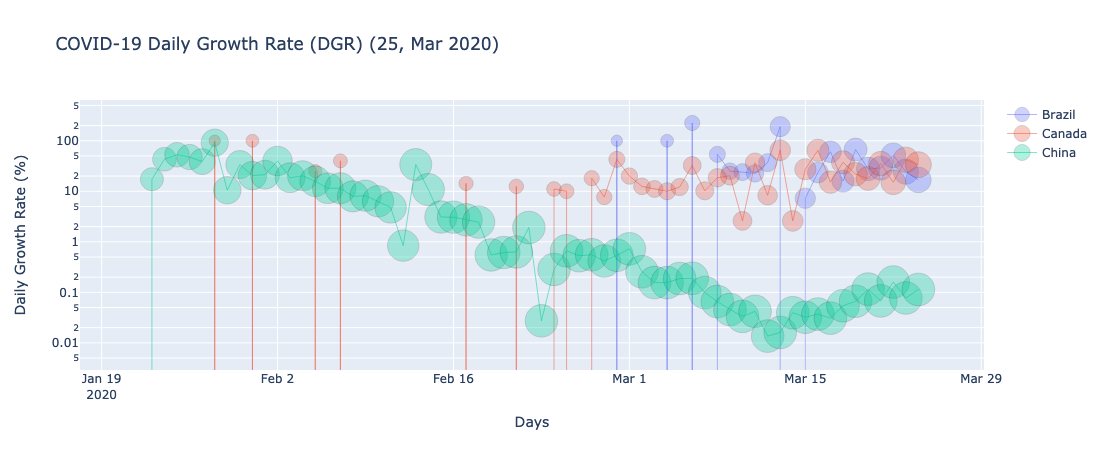

In [140]:
# Prepare dataset
df1 = pd.DataFrame({'Day':'','country':'','cases':int(),'rate':float()}, index=[1])
df1 = df1.drop(df1.index)

for country in dfA.columns[1:]:
    rate = str('rate' + '_' + country)
    dfAux = pd.DataFrame(dfFinal[['Day',country,country,rate]])
    dfAux.columns = ['Day','country','cases','rate']
    dfAux['country'] = country
    df1 = df1.append(dfAux)

df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
#df1.loc[df1.country == 'Brazil'].tail()

# Plot Graph
fig = go.Figure()
last_upt = dt.date.today() #- dt.timedelta(days=1)

title = 'COVID-19 Daily Growth Rate (DGR) (' + "{:%d, %b %Y}".format(last_upt) +')'
#autor = 'Author: Prof. Carlos Ed Beluzo - cbeluzo@gmail.com'
#data_source= 'Data source: data.humdata.org'

for country in df1.country.unique():
#for country in ['Brazil','Canada','China']:
    a = df1.Day
    b = df1.loc[df1['country'] == country]
    ratio_size = np.log(b.cases)
    ratio_size[np.isneginf(ratio_size)] = 1
    ratio_size = ratio_size * 2 + 10
    
    fig.add_trace(go.Scatter(x=a, y=b.rate, 
                             mode='lines+markers', 
                             name=country,
                             line=dict(width=0.5),
                             text=b.country,
                             customdata=b.cases,
                             #text=np.full((dfA.shape[1],1), country),
                             marker = dict(size = ratio_size,
                                           opacity= 0.3,
                                           line = dict(width = 0.5,
                                                       color = 'rgb(0, 0, 0)')
                                          ),
                             hovertemplate = "<b>%{text}</b><br>" +
                                             "<b>Confirmed cases: </b>%{customdata}<br>" +
                                             "<b>Day</b>: %{x}<br>" +
                                             "<b>DGR</b>: %{y:.2f}%<br>" +
                                             "<extra></extra>"
                             #TODO Hovertemplete colocar (%) e nome das colunas
                            ))

annotations = []

fig.update_layout(annotations=annotations,
                  xaxis_title='Days',
                  yaxis_title='Daily Growth Rate (%)',
                  yaxis_type="log",
                  title_text=title)

#fig.show()
plt.offline.plot(fig, filename="html/covid_19_time_serires_daily_growth_rate.html")
df1.to_csv(r'data/covid_19_time_serires_daily_growth_rate.csv', index = False, header=True)
